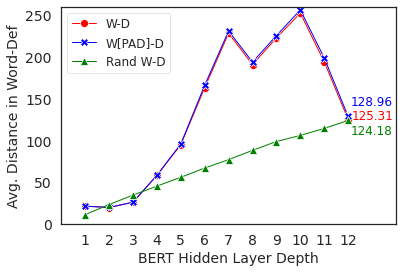

In [112]:
import seaborn as sns
import numpy as np

sns.set_theme(style="white", palette=None)

# Create some example data
x_values = list(range(1,13))
x_values = np.array(x_values)
y_values = """21.669	21.700	11.528
20.083	20.167	23.600
26.344	26.423	34.891
58.490	58.559	45.642
95.129	95.995	56.171
163.293	166.275	67.249
228.402	231.183	77.324
190.955	194.001	88.418
222.905	225.569	98.984
252.554	256.384	106.297
194.147	198.848	114.627
125.310	128.956	124.181"""

y_values = y_values.strip()
y_values = y_values.split('\n')
y_values = [ list(map(float, y.split('\t'))) for y in y_values ]
y_values = np.array(y_values)

# Create the plot using Seaborn
# sns.set(style='whitegrid', font_scale=1.2)
plt.grid(False)
# print(x_values.shape)
# print(y_values)
# print(y_values.shape)
sns.lineplot(x=x_values, y=y_values[:,0], color='red', linewidth=1, marker='o', markersize=8)
sns.lineplot(x=x_values, y=y_values[:,1], color='blue', linewidth=1, marker='X', markersize=8)
sns.lineplot(x=x_values, y=y_values[:,2], color='green', linewidth=1, marker='^', markersize=8)

# # Add labels and title
plt.xlabel('BERT Hidden Layer Depth', fontsize=14)
plt.ylabel('Avg. Distance in Word-Def', fontsize=14)
# plt.title('', fontsize=20, fontweight='bold')

# # Customize the tick labels
plt.xlim(0, 14)
plt.ylim(0, 260)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x_values)
# # Add a legend
plt.legend(['W-D', 'W[PAD]-D', 'Rand W-D'], loc='upper left', fontsize=12, framealpha=0.5)
plt.text(x_values[-1]+1, y_values[-1,1], f'{y_values[-1,0]:.2f}',
         va='center', ha='center', fontsize=12, color='red')
plt.text(x_values[-1]+1, y_values[-1,1]+25, f'{y_values[-1,1]:.2f}',
         va='top', ha='center', fontsize=12, color='blue')
plt.text(x_values[-1]+1, y_values[-1,1]-25, f'{y_values[-1,2]:.2f}',
         va='bottom', ha='center', fontsize=12, color='green')
# # Add text annotations
# plt.annotate('Local Maximum', xy=(np.pi/2, 1), xytext=(3, 0.5), fontsize=14,
#              arrowprops=dict(facecolor='black', shrink=0.05))

# # Save the plot as an image file
plt.savefig('word_def_distance_line_plot.png', dpi=600, bbox_inches='tight')

# # Show the plot
# plt.show()


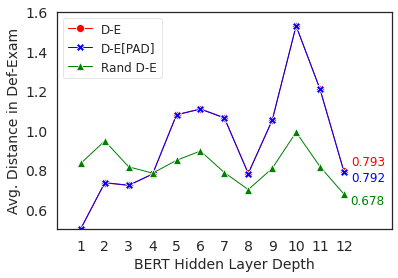

In [111]:
import seaborn as sns
import numpy as np

sns.set_theme(style="white", palette=None)

# Create some example data
x_values = list(range(1,13))
x_values = np.array(x_values)
y_values = """0.503	0.504	0.834
0.735	0.736	0.947
0.722	0.723	0.816
0.779	0.780	0.784
1.080	1.079	0.849
1.109	1.108	0.896
1.065	1.063	0.787
0.783	0.782	0.701
1.052	1.051	0.808
1.529	1.529	0.991
1.209	1.209	0.817
0.793	0.792	0.678"""

y_values = y_values.strip()
y_values = y_values.split('\n')
y_values = [ list(map(float, y.split('\t'))) for y in y_values ]
y_values = np.array(y_values)

# Create the plot using Seaborn
# sns.set(style='whitegrid', font_scale=1.2)
plt.grid(False)
# print(x_values.shape)
# print(y_values)
# print(y_values.shape)
sns.lineplot(x=x_values, y=y_values[:,0], color='red', linewidth=1, marker='o', markersize=8)
sns.lineplot(x=x_values, y=y_values[:,1], color='blue', linewidth=1, marker='X', markersize=8)
sns.lineplot(x=x_values, y=y_values[:,2], color='green', linewidth=1, marker='^', markersize=8)

# # Add labels and title
plt.xlabel('BERT Hidden Layer Depth', fontsize=14)
plt.ylabel('Avg. Distance in Def-Exam', fontsize=14)
# plt.title('', fontsize=20, fontweight='bold')

# # Customize the tick labels
plt.xlim(0, 14)
plt.ylim(0.5, 1.6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(x_values)
# # Add a legend
plt.legend(['D-E', 'D-E[PAD]', 'Rand D-E'], loc='upper left', fontsize=12, framealpha=0.5)

plt.text(x_values[-1]+1, y_values[-1,1]+0.05, f'{y_values[-1,0]:.3f}',
         va='center', ha='center', fontsize=12, color='red')
plt.text(x_values[-1]+1, y_values[-1,1]+0, f'{y_values[-1,1]:.3f}',
         va='top', ha='center', fontsize=12, color='blue')
plt.text(x_values[-1]+1, y_values[-1,2], f'{y_values[-1,2]:.3f}',
         va='top', ha='center', fontsize=12, color='green')
# # Add text annotations
# plt.annotate('', xy=(np.pi/2, 1), xytext=(3, 0.5), fontsize=14,
#              arrowprops=dict(facecolor='black', shrink=0.05))

# # Save the plot as an image file
plt.savefig('def_exam_distance_line_plot.png', dpi=600, bbox_inches='tight')

# # Show the plot
# plt.show()


In [186]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel

MAX_SEQ_LEN = 512
# MAX_SEQ_LEN = 256
EmbDict = torch.load("./EmbDict_WordDef")
import seaborn as sns
from tqdm.notebook import tqdm
sns.set(style="whitegrid")
x_axis, y_axis, x_axis_target, y_axis_target = [], [], [], []
pbar = tqdm(total = len(EmbDict))
idx = 0

crit_sum = nn.MSELoss(reduction='sum')
token_config = {"truncation": True, "padding": "max_length",
                            "max_length": MAX_SEQ_LEN, "return_tensors": "pt"}
TargetWords = ["love"]
Tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
Embedding = AutoModel.from_pretrained('bert-base-uncased')
Embedding.eval()
Word = Tokenizer(TargetWords, **token_config)
# Word = torch.tensor(CLS_id + Word + SEP_id + PAD_id*(MAX_SEQ_LEN-SpTokenCnt-len(Word))).reshape(1,-1).long()
# Embedding = nn.DataParallel(Embedding).to(device)
# Embedding = Embedding.cpu()
with torch.no_grad(): OutEmb1 = Embedding(**Word, output_hidden_states=True)

MinDist, MaxDist = 999, 0
MinWord, MaxWord = '', ''
for w, ds in EmbDict.items():
    for i, d1 in enumerate(ds):
        x_axis.append(w)
        Dist = crit_sum(d1, OutEmb1[2][-1][:,0,:])

        if MinDist > Dist:
            MinDist = Dist
            MinWord = w
            MinDefIndex = i
            
        elif MaxDist < Dist:
            MaxDist = Dist
            MaxWord = w
            
        if w in TargetWords:
            x_axis_target += [w]#*1000
            y_axis_target += [np.around(Dist, 3)]#*1000
#         else:
#             y_axis_target.append(0)
        y_axis.append(np.around(Dist, 3))
    
    pbar.update(1)
pbar.close()
x_axis = np.array(x_axis)
y_axis = np.array(y_axis)
y_axis_target = np.array(y_axis_target)
print(MinWord, MinDist, MinDefIndex)
print(MaxWord, MaxDist)

  0%|          | 0/30533 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/opt/conda/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 768])) that is different to the input

number tensor(27.2885) 0
exclusive tensor(468.4622)


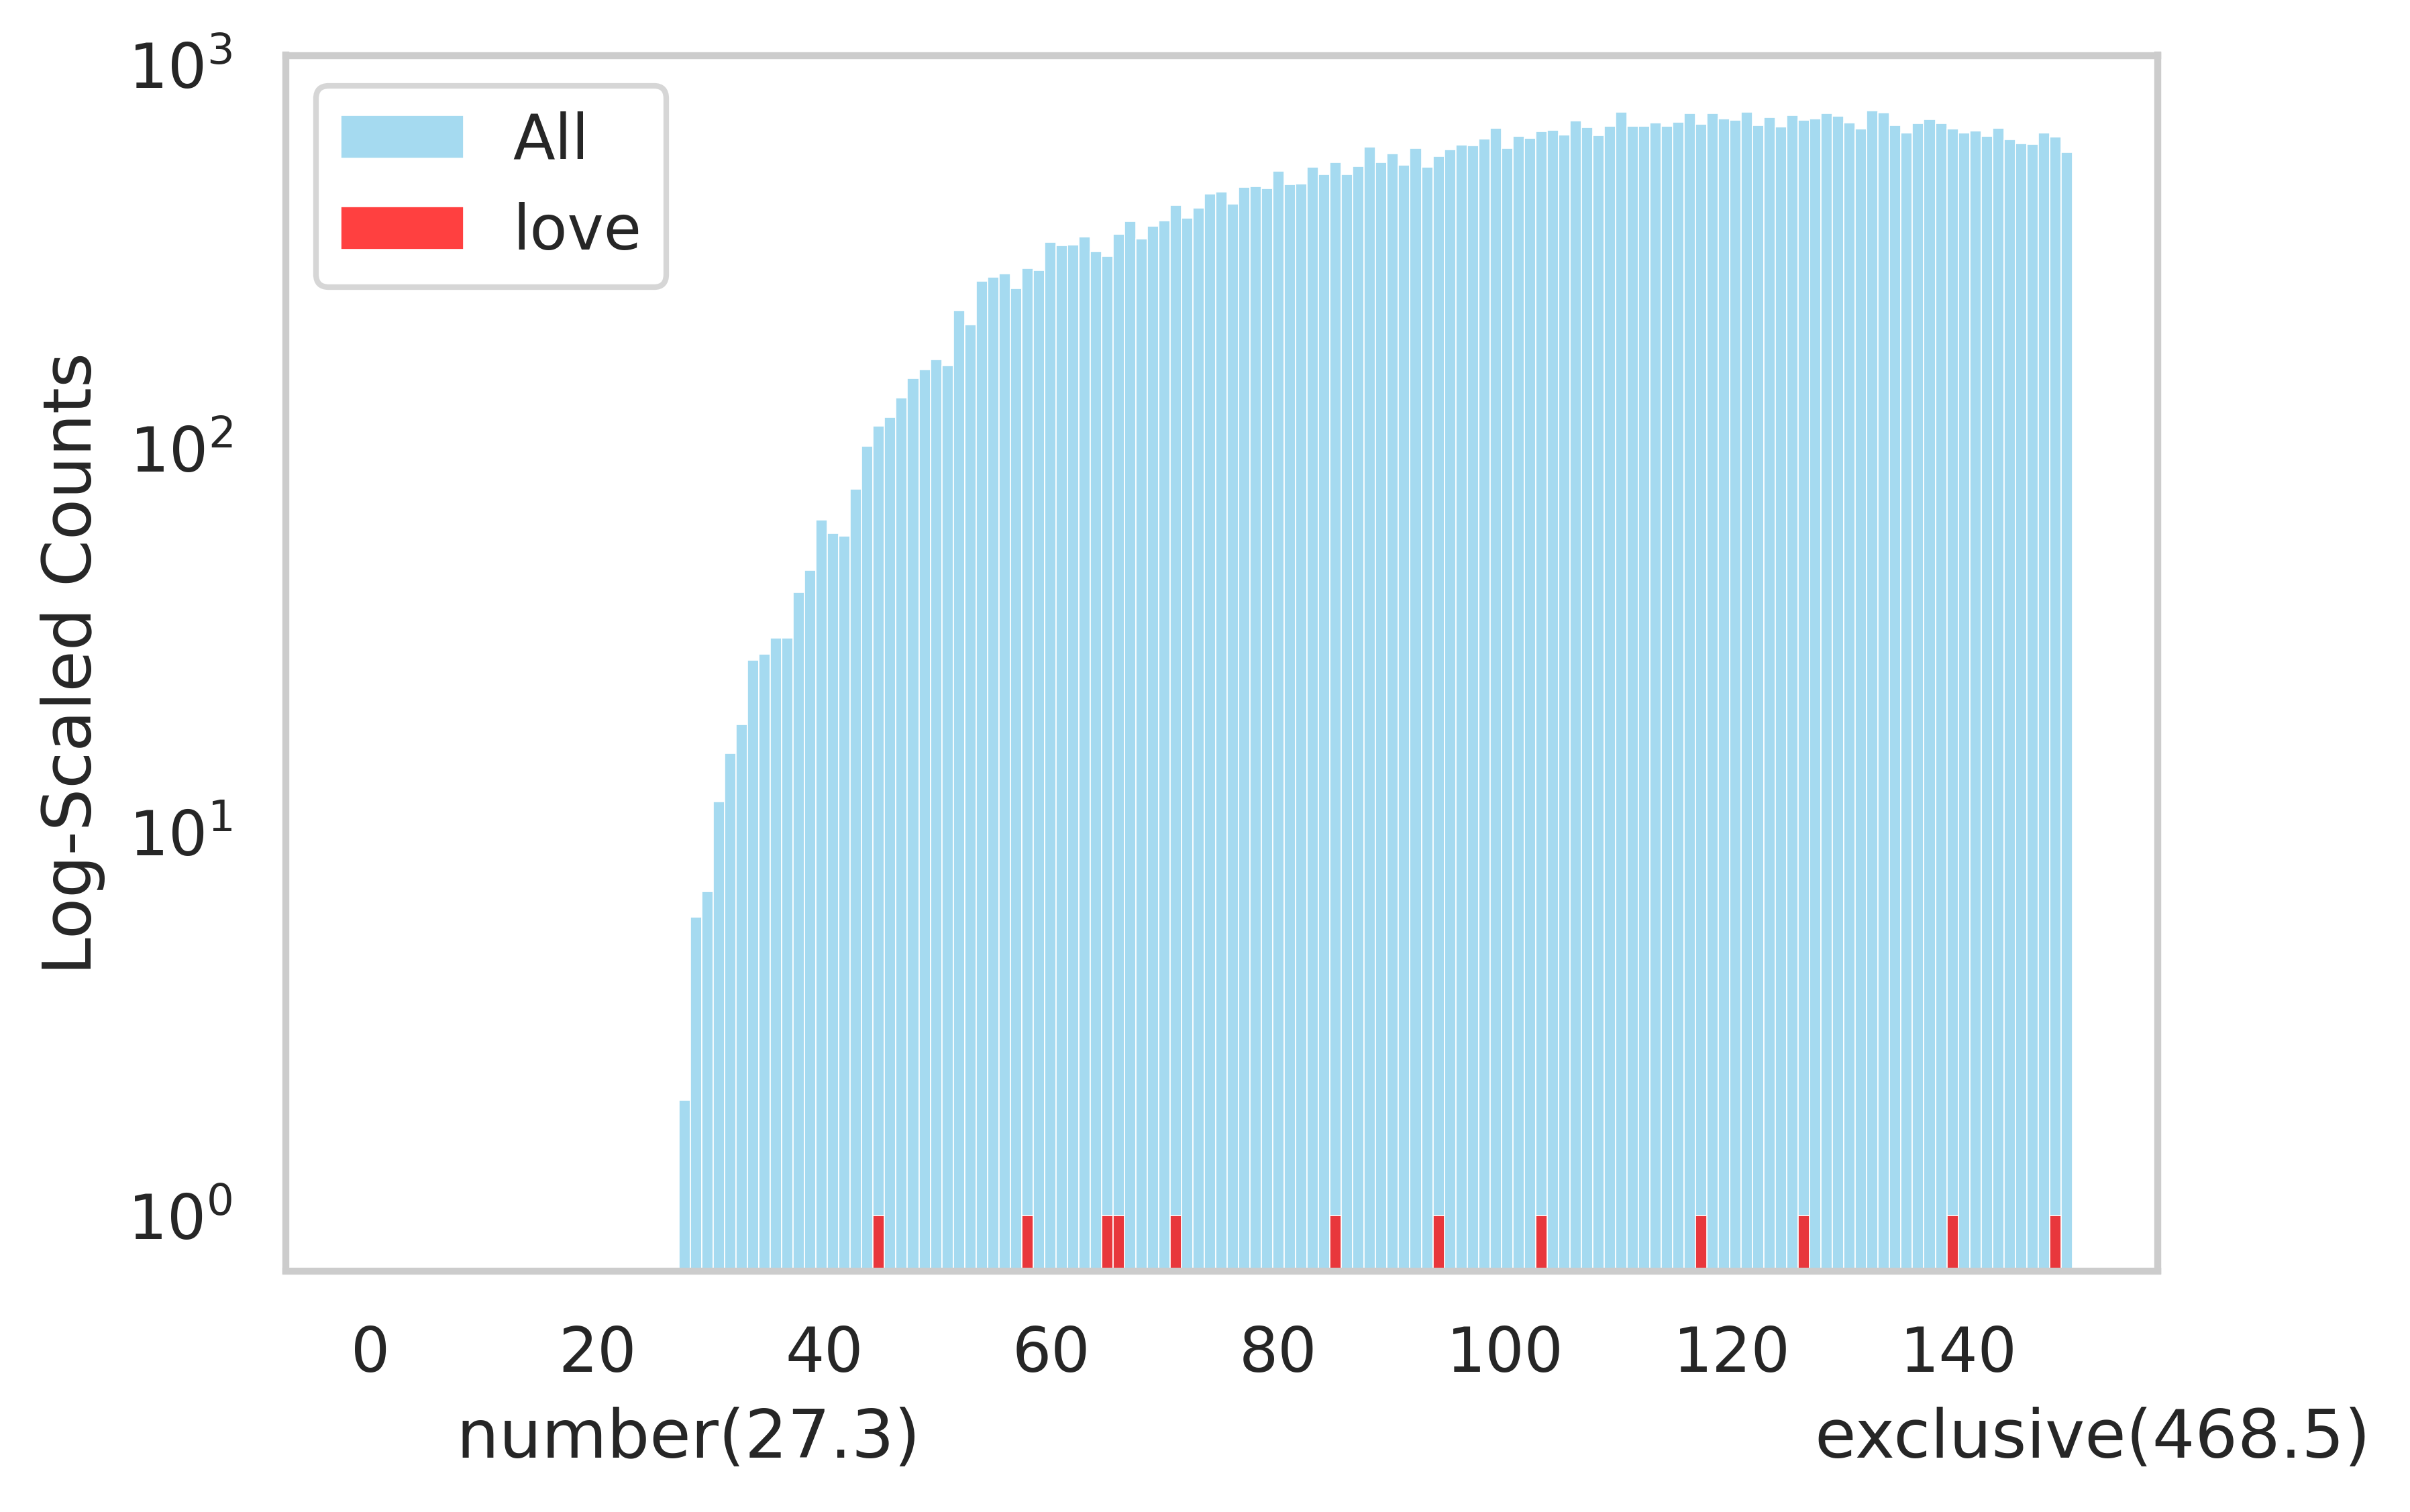

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=600)
bins = np.linspace(0, 150, 150)
ax = sns.histplot(data=y_axis, color='skyblue', bins=bins)
ax.set(yscale="log")
# ax.twinx()
bx = sns.histplot(data=y_axis_target, palette='bright', color='red', bins=bins)
# bx.set(yscale="log")
ax.grid(None)
# bx.grid(None)
ax.set_xlabel('                  '+str(MinWord)+'('+str(np.round(MinDist.item(),1))+')                                          '
              +str(MaxWord)+'('+str(np.round(MaxDist.item(),1))+')', fontsize=12)

ax.set_ylabel("Log-Scaled Counts")
plt.legend(labels=['All', str(TargetWords[0])])
plt.savefig('word_def_distance_bar_plot.png', dpi=600, bbox_inches='tight')

# bx.set_ylabel("Target Word Counts", rotation=270, rotation_mode='anchor', loc='center', labelpad=20)
# bx.set_yticks([1,2,3])
# bx.margins(5)
# bx.figure.subplots_adjust(right = 0.5)
# bx.margins(2)
# ax.set_title("Distances Distribution from '"+TargetWords[0]+"'", fontsize=14)
# ax.tick_params(labelsize=12)

In [188]:
Def = ['(of a tenant farmer) cultivate (farmland) giving a part of each crop as rent.']
Word = Tokenizer(TargetWords, **token_config)
Def = Tokenizer(Def, **token_config)

with torch.no_grad(): OutEmb1 = Embedding(**Word, output_hidden_states=True)
with torch.no_grad(): OutEmb2 = Embedding(**Def, output_hidden_states=True)

Dist = crit_sum(OutEmb1[2][-1][:,0,:], OutEmb2[2][-1][:,0,:])
print(Dist)

tensor(402.8372)


In [193]:
love_string = '''(def.) An intense feeling of deep affection. (ex.) babies fill parents with feelings of love | their love for their country | That year he moved to London but his love for Wales was strong and he eventually settled permanently there. | His love for children and affection for the sick have endeared him to all. | My brother, and his real, strong love for me that was able to pull me back into the world I know. | Each one is very powerful, but none of them is as strong as your love for your daughter. | There is no romance involved, still the affection and love for a friend is implied and understood. | Yet they still retain a strong love for their mother land, its culture and its traditions. | The long periods of separation never affected her love for her mother. | He was acting on his love for her and his strong need to make sure that she and their baby were being taken care of. | But the biggest thing in Amanda's life was children, her incredible love for them and devotion to them. | The conscientious objectors have nothing but admiration, pride and love for their homeland. | In my book, a mother's love for her child is the highest form of human love. | In short, how can there be love for the country without love for the people? | His devotion to his work and his love for children made him popular with both pupils and parents. | It is a moving account of his time in Chile, his love for the people and their love for him. | If there is one thing to beat crime it is love, love for our children, love for our family and friends, and love for all! | He has expressed his love for his mother in the most tender, touching terms. | Is it a story about love for your family, love for your country, a revolution. | I guess Michael and I were trying to find a way to express our brotherly love for one another. | Brotherly love comes at a price, it seems. | "I, too, have known a mother's love for her child. (def.) A feeling of deep romantic or sexual attachment to someone. (ex.) they were both in love with her | we were slowly falling in love | it was love at first sight | love songs | She did not overtly try to attract Edgar, but he was still falling in love with her. | He unexpectedly finds himself falling in love with a young refugee. | Falling in love with Maria, he comes to question rigid definitions of masculine and feminine. | Try falling in love with someone who is from a different country and speaks a different language. | You were falling in love with her, she already loved you, and you made a great couple. | I'm sure even if you somehow did end up falling in love with her, she'd never allow it. | It seemed completely unreal, the kisses we shared and how he said he was falling in love with me. | She frequently accuses me of cheating on her, or falling in love with someone else. | I might add that I have felt an intense passion and love for one man several years ago. | Passionate mutual love does not outweigh the imperatives of the class structure as they are presented in the novel. | Unrequited love is a painful thing to see. | There is a possibility of love at first sight and even a hasty marriage. | Finding love is a hard thing to do, but don't fret. | My love for her was as strong as ever, as it is now, at this very moment. | We have always happy together and our love for each other has been strong and growing for sometime now. | If your recent post is anything to go by, her love for you is as strong as ever! | Why can't two people our age fall in love and stay in love for the rest of our lives? | He lost his ambition and forgot everything but his love for this unworthy woman. | His last kiss still tingled on her lips, and she glowed in the warmth of the sun and their love for each other. | I had to try to put my intense passionate love for him to the side and be his friend. (def.) Affectionate greetings conveyed to someone on one's behalf. (ex.) give her my love | Big Hugs to Tamsin. I'm sending all my love and best wishes to Tamsin who goes in for her operation today. | We also send our best love to you and the children all wish that they were going on the same ship as their Father. | Now, I don't know her, but my heart goes out to her, and I'm sending my love. | We send our love to a wonderful woman and all the best for a speedy recovery. | I send her all my love, I know what it feels like, remember Debbie- me and my mum are always here for you. | Channel those emotions as you read this, and send me all your love and sympathy. | We send all our love and heartfelt sorrow for all your family and everybody who knew and loved you. | Everyone who knew David sends condolences and love to Janet at this sorrowful time. | Also all the rest of the assorted cousins and uncles and aunts send their love too. | For all of you have traveled with us and are embarking on new journeys, we send you our love. | Uncle Richard and Flora are still happy together, and they and Jamie send their love. | I send love to those who are here today and to those who cannot be here but who are listening. | I send them all love and big hugs with lots of prayers to them and their families. | All our love and best wishes on this special occasion from your family and friends. | Give my love to mother and Sarah and the children. (def.) A formula for ending an affectionate letter. (ex.) take care, lots of love, Judy | All the very very best to you Tom, and lots of love from Charlie. | Hmmm nothing of any import to say so I will sign off again, lots of love. | Looking forward to seeing you soon, Lots of love, Grannie (def.) A personified figure of love, often represented as Cupid. (ex.) Dante stands on the left, led by Love who bends to kiss Beatrice. | A winged Cupid, or Love, is represented as having gone before them, preparing the nuptial feast. | Love is shown as armed with bows and arrows. (def.) A great interest and pleasure in something. (ex.) his love for football | we share a love of music | Willie was the local historian, a very popular man who had a great interest and love of his locality. | I had a great interest and love of music, and music was always a part of the family, but no one had ever pursued it. | You'll need to read this book to taste his love of the hurley, the alley and hurling itself. | But he is one of life's great enthusiasts and his love of his subject is getting quite infectious. | Ian drinks his coffee and talks enthusiastically about his love of singing. | She dwells on her charming manner, love of clothes, loyalty to her brother and, in later life, to her adoptive city. | And these days he loves nothing more than combining his love of running with his passion for travel. | So passionate is my love of opera, that I crave any activity that extends my time in the Arts Centre. | Though coming from a football heartland, he had an even bigger interest and love for hurling. | Liam in his reply spoke of his love of the game and the enjoyment he still gets out of coaching. | He is remembered for his joviality and zest for life and love of the game. | He turned his love of surfing into a company worth more than half a billion dollars. | His love of animals preceded his love of gardening, and he says a good gardener is automatically a naturalist. | He loved his music and he passed on his love for music to his children. | He lived on a farm in the country and grew up with an appreciation and love for nature. | Years later he has combined his love for zoology with his appreciation of the female form. | Though her appreciation and love for music never subsided, Jen did not actively compose again for several years. | There is no questioning his enthusiasm and love for the game and you are always off to a good start when you have that kind of passion. | The fact that you would do it for free is just an indicator of your passion and love for it. | They share a mutual love of music and both are very deep thinkers. (def.) A person or thing that one loves. (ex.) she was the love of his life | their two great loves are tobacco and whisky | By the end of the trip I knew she had two loves; her son and her carpets. | This tale of country folk, their loves and hates, their customs, is like a prescription for our troubled age. | The prolific writer spent his life combining his two great loves - writing and the Lake District. | By the time he was a young man, his two great loves, politics and horse-racing, soon became apparent. | She was a young woman who had many loves in her life - most of which revolved around her family. | His chief love is painting, sorry, his two chief loves are painting and some old guru or other. | She is fascinated with history and theatre, two loves passed down from her mother. | While she was a singer first and foremost, she is loathe to choose between her two loves. | My job and my family are both great loves of my life and have helped. | She tours America and in the process of winning recognition she betrays her loves and her artistic beliefs. | The two loves of the club crooner's life were always his wife - and song. | Music was one of his great loves and before long he could play several instruments. | He had three great, simple loves in his life, his family and friends, his football and his faith. | The lives, loves and actions of everybody are shrunk down so that everyone can have their fifteen minutes of fame. | The talk covered not only her life and loves but also family and domestic life in the 13 th century. (def.) A friendly form of address. (ex.) it's all right, love | It's alright my love you are safe with me. | It's alright my love, what you want to know I'll tell you. Ask me. | It's alright my love! I'm here! Everything will be just fine! | It's alright my love. We're all feeling emotional. (def.) Used in affectionate requests. (ex.) don't fret, there's a love | "Don't choke 'im, there's a love". | "Emily, my dear," said the spinster aunt, with a patronising air, "don't talk so loud, love." | Stop complaining about free speech and don't be a hypocrite, there's a love. (def.) (in tennis, squash, and some other sports) a score of zero; nil. (ex.) love fifteen | More so in the second set where Jones held four out of five service games at love. | To come back from two sets to love and win it is an awesome feeling. | The running tennis score of each of the games is expressed in a style peculiar to tennis: score in a game from zero to three points is represented as zero (or "love"), fifteen, thirty, and forty correspondingly. (def.) Feel deep affection for (someone) (ex.) he loved his sister dearly | there were four memorial pages set up by her friends in honour of Phoebe, saying how much they loved and missed her | He truly did love her, and deep down he knew his family would too, but he was still nervous. | Though you tried to deny it, you must trust your heart that deep inside you love him. | A part of me hoped that deep down he really did love me for that. | That's why if I could have one wish, it would be for you to never stop loving me. | His love wasn't true and you will find someone who loves you and really respects you. | Your daughter may already know that this man is taking advantage of her but, as she loves him, she may be unable to resist his charm. | Of course he loves you, and he always will. | To find someone you are compatible with and who loves you is enough. | But after this, I'll do whatever I have to do to keep him because he's shown he loves me. | He replies talking about having a wife he loves and who loves him, a wonderful daughter and a good life. | I have hinted that this is a bad thing but she says that she loves him. | I believe her when she says she loves me and I know I mean it when I say I love her. | The sense of disappointment left me empty inside, obviously nobody loves me. | Many a woman's mother has suggested that it is a good idea to marry a man who loves you more than you love him. | She's rung me and told me she loves him, he loves her and they want to be together but I can't accept that. | There are hot croissants downstairs, and a man who loves me despite and because of everything. | "I love you baby, " Kelly says, hugging her. | I love you baby, and that's all that matters. | Maybe then, and only then, could I truly be loved in return? | He loves his wife, enjoys her world, shares her clothes, goes shopping with her. (def.) Feel a deep romantic or sexual attachment to (someone) (ex.) she really loved him | I do realize that people get married because they love each other (def.) Like or enjoy very much. (ex.) I just love dancing | I'd love a cup of tea | I love this job | they love to play golf | Sarah loves the outdoors and enjoys swimming, surfing, gardening, cooking and camping. | But thousands of ordinary people would love the chance to enjoy opera more fully. | What we do is for people who really love his music. | Pete is not able to say that the crowds have always loved watching him play. | We contemplated going in several directions, but we've always loved what we've done. | But something slowly began to dawn on me - I still loved what I did. | Some of the local children absolutely loved the idea of finding bugs and learning more about their native environment. | The children have really loved the whole idea of it. | I'd absolutely love to hear what you have to say! | I would absolutely love to hear about it. | "Our fans love to see quality homegrown talent. | How could our kid not love the great outdoors? | The rustic cottage, constructed with pine slats, was the home of a man who loved the outdoors. | "I thought all girls love to dance. | The many teenagers in the audience loved the music and seemed to know every number. | The guy loves music, and this was apparent every single time he was onstage. | He loved working in his garage and being in the bush, cutting wood. | During his free time, my husband loves working on computers and audiovisual systems. | After that I'd get out and do lots of gardening; I love gardening. | She loved gardening and flowers and spent many happy and contented days in the garden.'''
love_string = love_string.split('(def.)')
Defs = []
for l in love_string[1:]:
    l = l.strip()
    d = l.split(' (ex.)')[0]
    Defs.append(d)

In [194]:
definition_string = '''number (def.) An arithmetical value, expressed by a word, symbol, or figure, representing a particular quantity and used in counting and making calculations. (ex.) think of a number from one to ten and multiply it by three | even numbers | We also counted the number of words, abbreviations, symbols, numbers, and values in each record. | Finding the ideal ratio of words to numbers may prove a fruitful area for further research. | The whole number part starts off your list of numbers for the continued fraction. | Is it the numerator of a Bernoullian number, or one occurring in some continued fraction? | For most purposes this number system could represent all the numbers which might arise in normal day to day life. | He considered computation with irrational numbers and polynomials to be part of algebra. | According to Bellavitis, the plane does not just provide a means to represent complex numbers. | For our geometrical problem, g is a positive number so the first value is the one we want. | The real number system consists of all numbers that can be represented by infinite decimals. | Hyphenated words, symbols, numbers, and abbreviations were counted as one word. | It made possible the standardization of texts as well as symbols, numbers, and figures. | We need to think more carefully about numbers and the mathematics we use to work with them. | Vedic scholars did not use figures for big numbers in their numerical notation. | He is perhaps best known for playing a role in the development of the ASCII code for representing English characters as numbers. | These are combined and shown both in actual numbers and as ratios in the bar graph. | It is a personal state of being that cannot be reduced to numbers and decimal points. | Book 3 contains a description of how to carry out arithmetic with irrational numbers. | A child with a math disability has problems with numbers and math symbols. | Note that the allelic state for a pair of lineages is represented by two numbers in brackets. | She said they enjoy coming up with different combinations of numbers. (def.) A figure or group of figures used to identify someone or something. (ex.) she picked up the phone and dialled his home number | A brief name description and gene ID accession number is given to the right hand side of each ratio. | Sequences included in this study and their accession numbers are listed in table 1. | A minimum of one Lotto ticket serial number is drawn from all valid tickets each Lotto draw. | Her third round opponent is none other than the Belgian number two seed Kim Clijsters. | In a tense final he was beaten by the championship's number two seed Bobby Brook. | Number eight seed Guillermo Coria upset Wimbledon finalist David Nalbandian to reach the semi-finals. | He will revert to the bench with his number eight slot assumed by skipper Kay. | At the Munich Lions he wears the number eight jersey. | Relieved of the number three slot, Dravid had the occasional opportunity to play finisher. | She has helped take George to the number three slot in the UK clothing market. | The club has also issued a hotline number which residents can call if they have any complaints about the event. | Greater Manchester Police issued a number for friends or relatives to contact. | Why not just send them a phone book of every classified number in Great Britain. | I cannot produce statistical data of vehicle numbers and velocities to corroborate these assertions, but I have no doubts. | Soon I had scribbled down phone numbers of five different institutions teaching English in Hong Kong. | When travelling to the US, it pays to remember the combination numbers on your suitcase. | I can't abide rock, not least because it has 7 different E numbers in it and smells horrible. | If the numbers are different or the label is missing, then the unit has almost certainly been stolen and reprogrammed. | Of course, many of my books are British editions with slightly different page numbers. | At the moment I'm wrestling with huge combinations of ISBN numbers and country codes. (def.) Arithmetic. (ex.) the boy was adept at numbers (def.) A quantity or amount. (ex.) the company is seeking to increase the number of women on its staff | the exhibition attracted vast numbers of visitors | Ham House's ghost tours are attracting an increasing number of visitors. | The battlefields of Normandy are drawing increasing numbers of British visitors as the anniversary of D-Day approaches. | Simply, step one involves estimating the expected number of substitutions per site accumulating between sampling times. | The museum has exceeded expected visitor numbers and hit its 300,000 annual target within its first six months. | Five of the 10 harvested fruits were cut transversely to calculate the average locule number per fruit and average fruit. | Many departments already have instituted changes to methodology that have drawn growing numbers to literary studies. | All but one trial assigned an equal number of participants to the intervention and control groups. | Metrolink had opened in 1992 and doubled its passenger numbers over the next nine years. | Both airports claim they need a new runway to cope with increasing passenger numbers. | He said: " I'm alarmed by the growing number of occasions when guns are used. | The airport will need to be able to facilitate quick flight turnarounds as well as deal with growing passenger numbers. | The EP has rejected the Council's common position on only a limited number of occasions. | Instead, a limited number of substitutions occur at each site. | But, such debates could attract only limited number of people and erudite scholars. | To cope with the expected huge numbers of arrests 14 police garages are being converted into lock-up cages. | However, the numbers have dwindled to less than a quarter what they once were. | As our numbers grow too high, we bring down the excess population ourselves. | The numbers grow more staggering everyday, making the recovery from Hurricane Charley seem even more daunting. | What do you do when people aren't flocking to dance music in the numbers they used to? | To date, the duo have sold two-and-a-half million albums and about the same number of singles. (def.) Several. (ex.) we have discussed the matter on a number of occasions | The company has ruled out on a number of occasions a full listing on the stock market. | It has been reiterated on several occasions since through a number of declarations and statements. | All credit to Liverpool who put up a great fight and could have scored through Owen on a number of occasions. | This matter has been highlighted on a number of occasions but no one has been apprehended to date. | On a number of occasions I have refused a sale simply because I didn't like someone's face or their hands. | They have since completed the challenge on a number of occasions for different charities. | Stewart has come close to winning on a number of occasions and this is one major prize at home which has eluded him. | She said she felt she had to resign from Croft House after reports led to officials visiting the home on a number of occasions. | Over the past four weeks his car had been targeted on a number of occasions and has suffered thousands of pounds worth of damage. | I've met Henrik on a number of occasions and found him extremely pleasant. | An Englishman living in the area was held by police on a number of occasions, but was always released without charge. | As well as being a gifted man, he is rib-achingly funny, and has made me cry from laughing so hard on a number of occasions. | A council spokesman said they had tried on a number of occasions to carry out annual servicing of gas appliances. | The film allows screen time for a number of different dance pieces to be played out in their entirety, much like a musical. | They will be performing a number of songs and also designing the programme for the event. | A performing arts graduate, Janey Lee will perform a number of her own songs at the Billericay concert. | As a performer, she has danced with a number of different companies across the world. | As well as his operatic numbers he includes among his repertoire a number of Irish songs. | I quit consuming music products a number of years ago and make do with what I had legally acquired by then. | He has also written a number of original concert pieces and is currently composing a new opera. (def.) A group or company of people. (ex.) there were some distinguished names among our number | One of their number, party strategist Dominic Cummings, explained it to them recently. | The Scottish popular press doesn't have a lot of time for gays either, even though there are a few among their number. | However, the club are hopeful to have the tricky winger back among their number in the next few days to continue his trial. | When one was obtained it had to be smuggled past the camp guards, then passed to one of our number who was able to translate the news. | With men from west Wales among their number, they were among the first of the British troops to arrive in the Gulf. | One of their number apologised and explained that their friend was drunk. | It was amusing to see one of our number downing pints as I don't think I've ever seen her drunk before. | So why are so many politicians so prickly when one of their number spills the beans on another? | They count a chef, a traffic warden, a prison custody officer and a bank clerk among their number. | Among their number are troops able to bridge a 75 ft gap in as little as five minutes. | One of our number locked the cubicle from the inside and we passed boxes to him over the walls. | It's a good question, and as it happens, one of their number has come out of the closet today. | Among our number, there must be some who can bring home to the viewers the value and fascination of history as an art and science. | Christians in Basra are also grieving the loss of one of their number. | The death of one of their number had frightened them, but for how long? | Among their number were old friends or acquaintances who wanted to take a last look and perhaps to take home a memento. | Had there been a woman among their number, things might have been different. | One of their number, Tony, seemed to have adopted me and was willing to show me round. | He had offered one of our number the free loan of his Cotswolds mansion for the weekend. | The difference between our numbers in the House and Senate are not that vast. (def.) A large quantity or amount, often in contrast to a smaller one; numerical preponderance. (ex.) the weight of numbers turned the battle against them | Protesters find that their objections fall upon deaf ears; their reasons belittled and their sheer weight of numbers ignored. | Under the sheer weight of numbers, grandparents, aunts and uncles have begun to disown their own. | But when has weight of numbers been a reason to pre-empt the outcome of a parliamentary inquiry or cut it short? | It is very rare for the award to be won by teams outside Lismore, with the bigger clubs dominating simply though weight of numbers. | Leinster hit back with the weight of numbers and forced Newcastle to concede a penalty try with just five minutes remaining. | Pure puzzles put Agatha Christie at the head of the field, and weight of numbers and lack of trendiness have kept her there. | Weight of numbers alone suggests the Russians hold all the aces this year. | Sheer weight of numbers continues to favour players from the States. | They overcame enormous odds right from the outset but eventually got crushed by weight of numbers. | There were a number of hold ups along the route caused by sheer weight of numbers, but spirits remained high. | Exhaustion and weight of numbers also took their toll. | There are a terrifically large number of planets in the galaxy and many people say that the sheer weight of numbers means that life must exist. | Homelessness services are creaking under the weight of numbers, cuts in funding and privatisation in health services. | One obvious advantage was sheer weight of numbers: at both Valmy and Jemappes the enemy was heavily outnumbered. | Clearly, the other parties did not have the weight of numbers needed to force that to happen, so we are where we are today. | Was she thinking that weight of numbers might help in a fight? | Many of the injured headed for local hospitals which quickly became overwhelmed by the sheer numbers of casualties. | The numbers of different sizes, shapes and colours available never ceases to amaze me. | He was riding his camels along when he saw numbers of spherical white objects. | The Germans may have had a fine submarine on paper but producing it in numbers was a different matter. (def.) A single issue of a magazine. (ex.) the October number of ‘Travel’ (def.) A song, dance, piece of music, etc., especially one of several in a performance. (ex.) they go from one melodious number to another | For her audition Natalie had to recite two drama pieces and perform three song and dance numbers. | The performers will also tackle solo songs and duets, group numbers, character dances, duologues and slapstick. | In one of the program's dance numbers, he performed Topeng Dalem with refined and deeply touching movements. | Dance and music numbers were the major highlights of the programme. | Chow throws in big dance numbers, songs, humour and chase scenes that play like Wiley E Coyote trying to catch Roadrunner. | Perhaps not as funny as they're intended to be, the song and dance numbers are highly entertaining just the same. | While you eat, Burmese dancers perform some traditional numbers accompanied by music of their own. | Skits, songs and dance numbers will be among the highlights of the show. | One afternoon was filled with poetry readings, theatrical performances and dance numbers. | In summary: the major disappointment of Revenge of the Lisp is that there are no big song and dance numbers. | Intended for comic relief, the song and dance numbers come across as uninspired and robotic. | The directional effects here are utilized fully when the songs and dance numbers come into play. | The sets and costumes are brilliant, as are the dance numbers and musical performances. | Basically what we have here is a nice, sentimental excuse for lots and lots of song and dance numbers. | In Glasgow, pantos are a series of song and dance numbers strung together with a bit of patter. | This engineering graduate has carved a niche for himself in Malayalam music with his melodious numbers. | Chadha's film joyously embraces the elaborate song and dance numbers that are the mainstay of Bollywood. | Charlie Smyth and the Cast of Cinderella will also perform a few numbers from their sell-out pantomime. | I certainly had lumps in my throat - but only when I wasn't marvelling at the many spectacular dance numbers. | The cast were great and some of the upbeat numbers and high-energy dance routines were a joy to watch. (def.) An item of clothing of a particular type, regarded with approval or admiration. (ex.) Yvonne was wearing a little black number | The dress was a sleek, black number with tiny, silvery sequins along the low neckline. | She pulled it off, to find a slinky black number, with thin spaghetti-straps and a jagged edge. | Her friend is one of those people who have no creativity so they just throw on some cat ears with some black slinky numbers. | He found the car, a sleek little black number, and slid behind the wheel. | Noteworthy numbers were the knitted fur cardigans and the silver foil fur-lined jackets. | Last weekend, the Crown was packed with dinner jackets, black ties and pretty girls in scanty numbers. | Or maybe it's a racy nouvelle vague number, all headscarves and bicycles made for two. | Their new away shirt, launched this week, is a natty white number featuring an orange sash. | Made of silky nylon and soft mesh, these little numbers feel so comfortable you may not want to take them off. | Carhartt's roomy over-the-head numbers in soft red or mid-blue have equally roomy front pocket. (def.) A grammatical classification of words that consists typically of singular and plural, and, in Greek and certain other languages, dual. (ex.) the form of English pronouns reflects their number and gender | Countable nouns make a distinction between singular and plural number. | Human nouns have a distinct class marking mechanism based on number and gender. | There was a time a few years ago when the United States was spoken of in the plural number. | It has a dual number, so nouns and verbs must be learned in singular, dual, and plural. | Nouns are marked for gender, number, and case as well as for definite and indefinite forms. (def.) Amount to (a specified figure or quantity); comprise. (ex.) the demonstrators numbered more than 5,000 | Last year's total Jewish immigration into Israel, numbering some 23,000, was a 15-year low. | The military forces number about fifteen thousand and are among the best trained in Africa. | Current playable songs number only in the hundreds. | A crowd numbering in the thousands later marched on the nearest US base, hurling rocks and chanting anti-American slogans. | At the last two events, the crowds numbered in the millions. | The scientific staff will eventually number more than 200. | By 1920 the Catholic population numbered about seventeen million and included some twenty-eight ethnic groups. | And huge sea turtles numbering in the tens of millions flourished in the Caribbean. | Homes numbering in the tens of thousands have been destroyed or damaged beyond repair. | I smiled and greeted those people I knew, who numbered in the several dozens. | In preparing the shows he draws on his own record and compact disk collection numbering in excess of 2,000. | But in 2000, Native Americans actually numbered closer to 2.5 million. | At this point, I have boxes full of books, probably numbering somewhere close to 2000. | In preparing the shows he draws on his own record and compact disc collection numbering in excess of 2,000. | I used to have a contacts list that numbered no more than four people. | Metazoans inherited a genome of some still undetermined size, but certainly numbering many thousands of genes, from their protistan ancestor. | The Beja represent the dominant ethnic group of eastern Sudan, numbering an estimated three million inhabiting a vast arid region that encompasses three countries: Egypt, Sudan and Eritrea. | Sources within the disengagement authority say that's because so far the number of families filing for compensation are numbered in the dozens. | As the officers tried to subdue Gomez, a fourth man began to assault the cops, who by now numbered three women and one man. | By 1933 it numbered some two million, double the size of the army, which was hostile to them. (def.) Mark with a number or assign a number to, typically to indicate position in a series. (ex.) each document was numbered consecutively | Coffins are being numbered and marked with pictures of the dead inside. | The other series, known as the piezometer series, is numbered simply 1 to 104. | Intron positions were numbered consecutively beginning at the N-terminus of the alignment. | The permits shall be numbered consecutively at the time they are printed and shall be furnished by the Commissioner of Conservation and Natural Resources. | The paragraphs have been numbered for convenience of reference hereafter. | Each segment was named, numbered, and indicated on the log sheet reference. | Marked by colourful posts which are not numbered and which are situated at 1km intervals, walkers simply follow the Km signs, setting their own pace as they go. | They have printed cardboard disks that are numbered, and that is how service priority is assigned. | Timbers and stones have been numbered and their location recorded so the bridge will be put back together accurately, he said. | The forms will be sequentially numbered to record all proprietary plant and services purchases and any overspends or under spends to the budget. | Completion of this order will fill the 500 series with the balance of the order to be numbered 5101-5122. | Each book and report form should be numbered for identification and kept for three years. | Allocations were concealed in sequentially numbered opaque envelopes opened once written parental consent was obtained. | We randomised patients individually using sealed, opaque, sequentially numbered envelopes. | Codes were kept in sequentially numbered opaque envelopes until just before use. | The engineers providing the foam floor forms individually numbered more than 200 panels to match the architect's drawings. | The research assistants used consecutively numbered packs to allocate new participants to treatment groups. | Amino acids are numbered consecutively for each species and indicated at the right margin. | Editions are from 50 to 100 copies - signed and numbered by the artist. | All elements are hand signed and numbered by the artist, and retail for $1,250. (def.) Count. (ex.) strategies like ours can be numbered on the fingers of one hand | And thy servant is in the midst of thy people, which thou has chosen, a great people, that cannot be numbered or counted for multitude. | The number of subjects that I could discuss with my parents and claim genuine common experience could be numbered on the fingers of one hand. | The few which manage to maintain the consistency and flow necessary to repeated listening can be numbered on the fingers of one hand. | A study appearing today in the journal Science reports that the hunter-gatherers seem to be the only group of humans known to have no concept of numbering and counting. | You know, I really liked when he talked about this being a time for introspection and sort of looking at what we do and why we do it and numbering our days and making sure that the time that we have here is used wisely. | I looked away, certain that every blade was numbered. (def.) Include or classify as a member of a group. (ex.) the orchestra numbers Brahms among its past conductors | The Wheelers were the best cycling club in the city, numbering among their members Ian Steel, who made an abortive appearance in the 1955 Tour, and Billy Bilsland, who had followed Steel and Ken Laidlaw to race in France. | The Accademia d' Italia, set up in 1929 in imitation of France, never had any real prestige or significance although it numbered among its members a few men of real merit. | Weigand got really mad when he found out that Dell numbered Handgun Control as a member of its sales affiliate program, by which companies gain fees for referrals. | Great Alardyce is indeed of the same generation as Carlyle, Harriet Martineau numbering as a member of both eminent men's circles. | Both Jefferson and Madison numbered the act among their greatest accomplishments.'''
Defs = []
definition_string = definition_string.strip()
definition_string = definition_string.split('(def.)')
for d in definition_string:
    d = d.strip()
    d = d.split(' (ex.)')[0]
    Defs.append(d)
    
for d in Defs:
    Word = Tokenizer(TargetWords, **token_config)
    Def = Tokenizer(d, **token_config)

    with torch.no_grad(): OutEmb1 = Embedding(**Word, output_hidden_states=True)
    with torch.no_grad(): OutEmb2 = Embedding(**Def, output_hidden_states=True)

    Dist = crit_sum(OutEmb1[2][-1][:,0,:], OutEmb2[2][-1][:,0,:])
    print(d, Dist)

number tensor(41.7622)
An arithmetical value, expressed by a word, symbol, or figure, representing a particular quantity and used in counting and making calculations. tensor(198.3469)
A figure or group of figures used to identify someone or something. tensor(91.1600)
Arithmetic. tensor(133.6369)
A quantity or amount. tensor(84.1159)
Several. tensor(27.2856)
A group or company of people. tensor(74.4379)
A large quantity or amount, often in contrast to a smaller one; numerical preponderance. tensor(143.6513)
A single issue of a magazine. tensor(68.5045)
A song, dance, piece of music, etc., especially one of several in a performance. tensor(142.1216)
An item of clothing of a particular type, regarded with approval or admiration. tensor(133.0635)
A grammatical classification of words that consists typically of singular and plural, and, in Greek and certain other languages, dual. tensor(127.7113)
Amount to (a specified figure or quantity); comprise. tensor(169.7948)
Mark with a number or as

In [195]:
definition_string = '''hate (def.) Feel intense dislike for. (ex.) the boys hate each other | two separate polls confirmed he is hated by the public | Due to disliking or hating someone or simply being angry with them, we develop harmful thoughts directed at that person. | I didn't mean to make people hate him, just dislike him sometimes. | What he had said was all through rage, he didn't really hate Cooper… just disliked her. | It was almost as if writing movies had given people one more reason to hate me, or dislike or resent me. | The boys didn't only hate me because I danced and was different, but because the girls loved me! | The German boys hate you, and I as one of them would like to tear you to pieces. | Most of us were put through a system which led us to hate, or certainly dislike, the language which we should love. | I have to say also that I find it very hard to hate or even significantly dislike someone. | It's so easy to put yourself down; to criticise, despise and hate the fat that you see as representative as some sort of failing on your part. | Most of the kids are rich, snobby preps, which we despise, and hate everyone who isn't like them. | I mean we're not sure if Aurora hates Jonathan but we know Jonathan hates her, or at least dislikes her very much. | She didn't hate him, but severely disliked him most of the time. | She couldn't stand it when someone disliked her, let alone hate her! | Just because he dislikes me, he's causing everyone else to hate me too. | I am not saying that you shouldn't dislike another team, but to hate another for no apparent reason is stupid. | We know the devastation that can be caused when different religions start hating each other. | I wanted to clear up the rumors of us fighting with each other or hating each other. | A camp young man and a grumpy mountain type who were the first on the island hated each other's guts. | They hated each other, slept in separate rooms all their married life and barely spoke. | I'm glad they found love, because they used to hate each other. (def.) Have a strong aversion to (something) (ex.) he hates flying | I'd hate to live there | And this is the girl who used to hate thoughts of ill-will towards other living creatures, human or otherwise. | And in a mixed gym it isn't polite to mention you hate to hear men grunting, sweating and groaning next to you. | Dario replied regretfully, hating to see his protégé suffering like this. | There I said it, I hate cooking. I hate the chopping part, I hate the stirring part, I hate hot water/oil splashing on to my hands, I hate cleaning up. | I hate having to wash my hair every single day. I need a spray powder shampoo. (def.) Used politely to express one's regret or embarrassment at doing something. (ex.) I hate to bother you | I hate to bother you with it, dear readers, but right now I can think of nothing else. | I hate to be a bother, but none of your journal entries past Sunday's have shown up in my LiveJournal friends list. | I hate to intrude with reality, but did the WWF bother to ask where all this increase in population is going on? | I hate to say this, but I can't be bothered to do an article this week. | I hate to see front gardens entirely given over to the family saloon but when the car has to be parked there, it is unrealistic to plan the space without taking it into account. (def.) Express strong dislike for; criticize or abuse. (ex.) I can't hate on them for trying something new | Those who are PC haters can have a blast shooting at the PCs littered around with your weaponry. | The successes of someone so different from them are just unbearable to these jealousy-consumed haters. | Can you believe that there are these haters on the internet with an entire website dedicated to being mean to Andrew? | To all you backstabbers, haters and bastards, I hope you die slowly and painfully! | They are such haters that upsetting normal people leading everyday happy lives is their real kick. (def.) Intense dislike. (ex.) feelings of hate and revenge | The father was blinded by rage and had nothing but a stare that was glaring with hate for what he believed had happened. | Discourtesy was the cornerstone of Mercer's hate for the world. | His youthful hate for a few had turned to a dulled resentment of an entire class. | They are unanimous in their hate for me - and I welcome their hatred. | I have a serious, blood-boiling hate for Shrek. | However, you should never lose your temper out of hate for the enemy. | That's the voice of a man stoking the fires of hate for political gain. | They are articulated with energy and in a way that often crosses the line between criticism of opposing belief systems and expressions of contempt and hate for political opponents. | The isolation restricts your mind and you're likely to become a very angry, bitter recluse full of hate for others as well as yourself. | Just for one moment you could have put aside your blind hate for the country, but you did not. | Therefore, if we could just get to the root cause of their hate for us, maybe we could make them stop hating us. | I think it has to do with his hate for falsity in people. | And the strange thing was I still did not know what had sparked off her intense hate for me. | He had left a storm within her heart, raging with hate for him. | How could it be possible to have so much hate for a girl? | Donnie's eyes showed his deeper hate for him, he hated his bloodshot blue eyes, he hated his fake blonde hair, and he hated how similar he looked. | I mean, we met in the third grade and bonded over our mutual hate for the class bully, Johnny Donovan. | Parts of the public do all they can to support a certain politician, while they are filled with hate for his or her enemies among the other top leaders. | Then becoming so consumed with hate for them, she went psychotic. | Her sorrow seemed bittersweet; a mix of her sour hate for whatever had caused her so much grief and the sweet memories of what she had lost. (def.) Denoting hostile actions motivated by intense dislike or prejudice. (ex.) a hate campaign | A tribunal was told Mr Carroll was subjected to an intense hate campaign after he was exposed as the fireman telling bosses of an alleged scam at Horwich station, near Bolton. | Having thought that the hate campaign Mrs Goodrick has waged against the entire German nation had finally come to an end, I see she is still determined to keep this thing going. | The man at the centre of the row told supporters of the hate campaign against him. | There are times in this fabulous country when I can almost convince myself that the hate campaign is a myth. | He has become the target of a hate campaign by activists who call for tolerance of their beliefs. | If a politician has been subject to public opprobrium they are legitimate targets for a media hate campaign. | A national hate campaign began against the economic migrants who were posing as refugees. | They must avoid bad tactics of slander, dirty tricks, smear campaign and hate speeches that discourage citizens to participate in politics. | A zero tolerance campaign to stop race hate attacks, domestic violence and attacks on elderly, disabled and vulnerable people will start in Bradford next year. | They have systematically poisoned the social environment through hate campaigns and this widened the Hindu-Muslim chasm. | Freedom, unless it gets squandered in the name of fear or defiance, will endure long after this fragile, rootless hate campaign has burned itself to ashes. | A couple today told how they were pushed to breaking point by a vindictive neighbour who waged a 15-month hate campaign against them. | Three people were killed and 129 injured during his two-week hate campaign targeted at minority communities. | The Congress Party has launched a campaign to halt hate speech against fellow citizens. | Threats and public verbal abuse were common, as was persuading friends and family to join hate campaigns. | Unfortunately, a lot of people seem to be on a personal hate campaign against Beckham, probably based on jealousy more than anything else. | If Microsoft carried out an anti hate speech campaign it would reassure a lot of parents. | Even in most democracies, it has become accepted, indeed constitutionally enshrined, that freedom of speech ends where hate speech begins. (def.) An intensely disliked person or thing. (ex.) Richard's pet hate is filling in his tax returns | Top hates were the lack of public transport, ‘not enough to do’ and ‘anti-youth prejudice.’ | She spends her spare time dreaming up anti - hobbies; politically correct organisations and human rights to store in her hutch of pet hates. | Of all my pet hates, people who claim to have read all of Dickens by the age of 15 rank as number one. | My pet hates are drivers who feel their way around in dusk or thick mists of rain without lights; and those who drive with headlights and front fog lights on clear nights. | Everyone has their own pet hates and those that really wind them up no matter what good they do.'''
Defs = []
definition_string = definition_string.strip()
definition_string = definition_string.split('(def.)')
for d in definition_string:
    d = d.strip()
    d = d.split(' (ex.)')[0]
    Defs.append(d)
    
for d in Defs:
    Word = Tokenizer(TargetWords, **token_config)
    Def = Tokenizer(d, **token_config)

    with torch.no_grad(): OutEmb1 = Embedding(**Word, output_hidden_states=True)
    with torch.no_grad(): OutEmb2 = Embedding(**Def, output_hidden_states=True)

    Dist = crit_sum(OutEmb1[2][-1][:,0,:], OutEmb2[2][-1][:,0,:])
    print(d, Dist)

hate tensor(24.7134)
Feel intense dislike for. tensor(82.1625)
Have a strong aversion to (something) tensor(91.2707)
Used politely to express one's regret or embarrassment at doing something. tensor(147.3811)
Express strong dislike for; criticize or abuse. tensor(173.5187)
Intense dislike. tensor(54.3370)
Denoting hostile actions motivated by intense dislike or prejudice. tensor(202.4965)
An intensely disliked person or thing. tensor(128.8087)


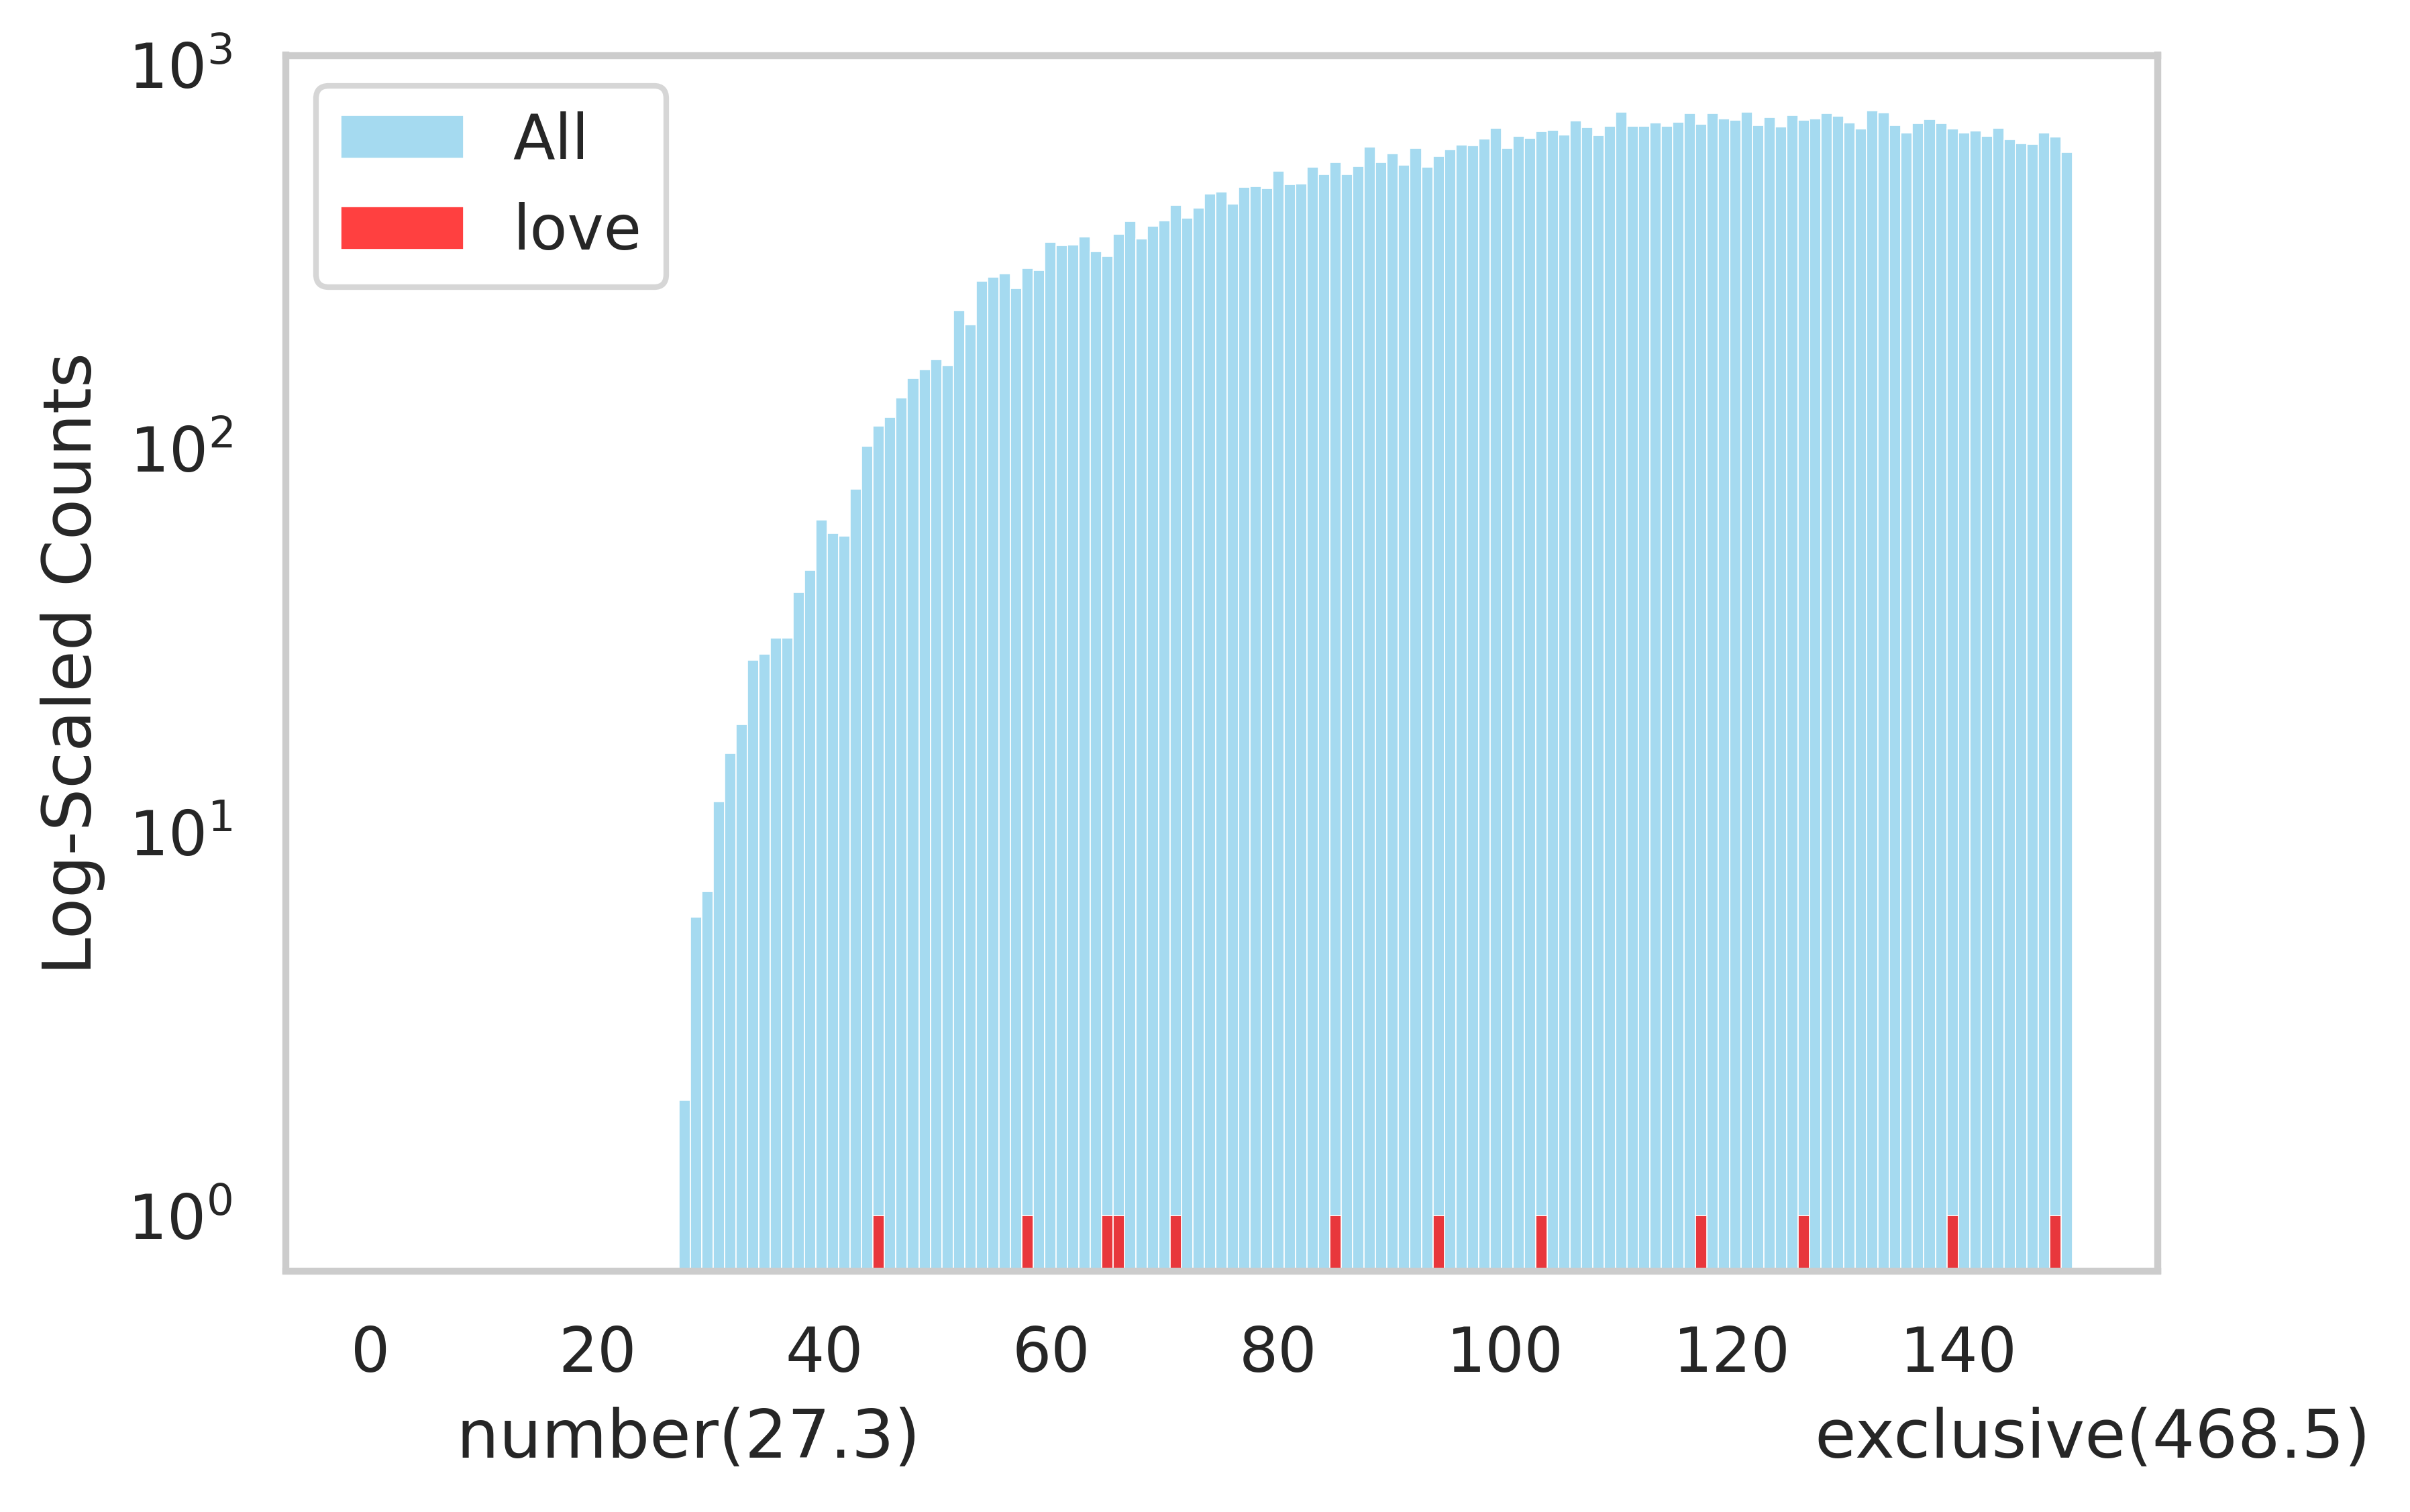

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=600)
bins = np.linspace(0, 150, 150)
ax = sns.histplot(data=y_axis, color='skyblue', bins=bins)
ax.set(yscale="log")
# ax.twinx()
bx = sns.histplot(data=y_axis_target, palette='bright', color='red', bins=bins)
# bx.set(yscale="log")
ax.grid(None)
# bx.grid(None)
ax.set_xlabel('                  '+str(MinWord)+'('+str(np.round(MinDist.item(),1))+')                                          '
              +str(MaxWord)+'('+str(np.round(MaxDist.item(),1))+')', fontsize=12)

ax.set_ylabel("Log-Scaled Counts")
plt.legend(labels=['All', str(TargetWords[0])])
plt.savefig('word_def_distance_bar_plot.png', dpi=600, bbox_inches='tight')

# bx.set_ylabel("Target Word Counts", rotation=270, rotation_mode='anchor', loc='center', labelpad=20)
# bx.set_yticks([1,2,3])
# bx.margins(5)
# bx.figure.subplots_adjust(right = 0.5)
# bx.margins(2)
# ax.set_title("Distances Distribution from '"+TargetWords[0]+"'", fontsize=14)
# ax.tick_params(labelsize=12)